 imports

In [1]:
%reload_ext autoreload
%autoreload 2
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
warnings.simplefilter('ignore', ConvergenceWarning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import pickle
#from SCRIPT.eval_tools import *
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from SCRIPT.eval_tools import * is python 2.o. install newer version

In [2]:
pip install scripts

Note: you may need to restart the kernel to use updated packages.


let's load some data! 

In [3]:
with open('pickle/timeseries_three_bedroom_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)
    
    subset_percent.index = pd.DatetimeIndex(subset_percent.index.values, freq='infer')
    subset_percent.columns = subset_percent.columns.astype(str)

enclose index of zips

In [4]:
select_zipcode = ['95823', '95673', '95834', '95815', '95829']

separate out

In [5]:
zip_1 = select_zipcode[0]
sel_df1 = subset_percent[zip_1]
zip_2 = select_zipcode[1]
sel_df2 = subset_percent[zip_2]
zip_3 = select_zipcode[2]
sel_df3 = subset_percent[zip_3]
zip_4 = select_zipcode[3]
sel_df4 = subset_percent[zip_4]
zip_5 = select_zipcode[4]
sel_df5 = subset_percent[zip_5]


next we will generate forecast from each zip. later we will combine

zip code 1

In [6]:
pdq = (0, 1, 0)
SPDQ = (0, 0, 1, 12)

-configured hyperparameters (above)

-trend elements
* pdq= 
* p: Trend autoregression order.
* d: Trend difference order.
* q: Trend moving average order.

-seasonal Elements
* spdq=
* P: Seasonal autoregressive order.
* D: Seasonal difference order.
* Q: Seasonal moving average order.
* S: The number of time steps for a single seasonal period.

define model and fit

In [7]:
sarima = SARIMAX(sel_df1, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, # Whether or not to transform the AR parameters to 
                 #enforce stationarity in the autoregressive component of the model.
        enforce_invertibility=False)
sarima_model1 = sarima.fit()



definitions for above
* seasonal_order = The (P,D,Q,s) order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.
* enforce_stationary = Whether or not to transform the AR parameters to enforce stationarity in the autoregressive component of the model. Default is True.
* enforce_invertability = Whether or not to transform the MA (Moving average) parameters to enforce invertibility in the moving average component of the model.

make prediction using .forecast function

In [8]:
pred1 = sarima_model1.forecast(steps = 3*12)

zip 2

In [9]:
pdq = (1, 1, 1)
SPDQ = (1, 0, 1, 12)

In [10]:
sarima = SARIMAX(sel_df2, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model2 = sarima.fit()

In [11]:
pred2 = sarima_model2.forecast(steps = 3*12)

zip 3

In [12]:
pdq = (0, 1, 0)
SPDQ = (1, 0, 1, 12)

In [13]:
sarima = SARIMAX(sel_df3, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model3 = sarima.fit()

In [14]:
pred3 = sarima_model3.forecast(steps = 3*12)

zip 4

In [15]:
pdq = (1, 0, 1)
SPDQ = (1, 0, 1, 12)

In [16]:
sarima = SARIMAX(sel_df4, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model4 = sarima.fit()

In [17]:
pred4 = sarima_model4.forecast(steps = 3*12)

zip 5

In [18]:
pdq = (0, 1, 0)
SPDQ = (1, 0, 1, 12)

In [19]:
sarima = SARIMAX(sel_df5, order=pdq, 
        seasonal_order=SPDQ, 
        enforce_stationarity=False, 
        enforce_invertibility=False)
sarima_model5 = sarima.fit()

In [20]:
pred5 = sarima_model5.forecast(steps = 3*12)

plotting out percent of increase

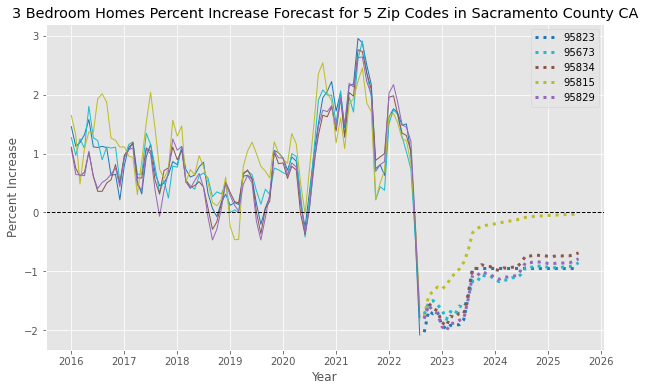

In [21]:
fig = plt.figure(figsize = (10, 6))
plt.plot(sel_df1.loc['2016-01-01':], lw = 1, color = 'tab:blue')
plt.plot(sel_df2.loc['2016-01-01':], lw = 1, color = 'tab:cyan')
plt.plot(sel_df3.loc['2016-01-01':], lw = 1, color = 'tab:brown')
plt.plot(sel_df4.loc['2016-01-01':], lw = 1, color = 'tab:olive')
plt.plot(sel_df5.loc['2016-01-01':], lw = 1, color = 'tab:purple')

plt.plot(pred1, ls = 'dotted', lw = 3, color = 'tab:blue', label = select_zipcode[0])
plt.plot(pred2, ls = 'dotted', lw = 3, color = 'tab:cyan', label = select_zipcode[1])
plt.plot(pred3, ls = 'dotted', lw = 3, color = 'tab:brown', label = select_zipcode[2])
plt.plot(pred4, ls = 'dotted', lw = 3, color = 'tab:olive', label = select_zipcode[3])
plt.plot(pred5, ls = 'dotted', lw = 3, color = 'tab:purple', label = select_zipcode[4])

#plt.axvline(x='2020-09-01', lw = 1, color = 'black', ls = '--')

plt.axhline(y=0, lw = 1, color = 'black', ls = '--')
plt.xlabel('Year')
plt.ylabel('Percent Increase')
plt.title('3 Bedroom Homes Percent Increase Forecast for 5 Zip Codes in Sacramento County CA')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()

 importData with  🥒 

In [22]:
with open('pickle/timeseries_three_bedroom_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)
    
subset.index = pd.DatetimeIndex(subset.index.values, freq='infer')
subset.columns = subset.columns.astype(str)

define function compute housing price

In [23]:
def compute_housing_price(zip_, pred):
    last_val = subset[zip_][-1]
    prices = []
    for rate in pred:
        current = last_val * (1 + rate/100)
        prices.append(current)
        last_val = current
    return prices

In [24]:
price1 = compute_housing_price(select_zipcode[0], pred1)
price2 = compute_housing_price(select_zipcode[1], pred2)
price3 = compute_housing_price(select_zipcode[2], pred3)
price4 = compute_housing_price(select_zipcode[3], pred4)
price5 = compute_housing_price(select_zipcode[4], pred5)

plotting out

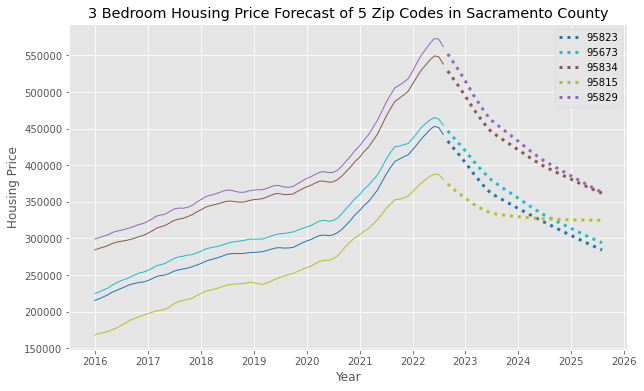

In [25]:
fig = plt.figure(figsize = (10, 6))
plt.plot(subset[select_zipcode[0]].loc['2016-01-01':], lw = 1, color = 'tab:blue')
plt.plot(subset[select_zipcode[1]].loc['2016-01-01':], lw = 1, color = 'tab:cyan')
plt.plot(subset[select_zipcode[2]].loc['2016-01-01':], lw = 1, color = 'tab:brown')
plt.plot(subset[select_zipcode[3]].loc['2016-01-01':], lw = 1, color = 'tab:olive')
plt.plot(subset[select_zipcode[4]].loc['2016-01-01':], lw = 1, color = 'tab:purple')


plt.plot(pred1.index, price1, ls = 'dotted', lw = 3, color = 'tab:blue', label = select_zipcode[0])
plt.plot(pred2.index, price2, ls = 'dotted', lw = 3, color = 'tab:cyan', label = select_zipcode[1])
plt.plot(pred3.index, price3, ls = 'dotted', lw = 3, color = 'tab:brown', label = select_zipcode[2])
plt.plot(pred4.index, price4, ls = 'dotted', lw = 3, color = 'tab:olive', label = select_zipcode[3])
plt.plot(pred5.index, price5, ls = 'dotted', lw = 3, color = 'tab:purple', label = select_zipcode[4])

#plt.axvline(x='2020-09-01', lw = 1, color = 'black', ls = '--')

plt.xlabel('Year')
plt.ylabel('Housing Price')
plt.title('3 Bedroom Housing Price Forecast of 5 Zip Codes in Sacramento County')
plt.legend(bbox_to_anchor = (1, 1))
plt.show()